<a href="https://colab.research.google.com/github/mcasivaram/Datascience/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/train-chennai-sale (1).csv")
df1=pd.DataFrame(data)



In [3]:
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df1.shape

(7109, 22)

In [5]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [6]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
df1.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
df1.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
df1.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


## DATA CLEANING
## **1ST COLUMN --> PRT_ID**

In [10]:
df1.PRT_ID.isnull().sum()

0

In [11]:
df1.PRT_ID.duplicated().sum()

0

In [12]:
df1.shape

(7109, 22)

In [13]:
df1.drop_duplicates(subset='PRT_ID')

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [14]:
df1.shape

(7109, 22)

In [15]:
df1=df1.drop('PRT_ID',axis=1)

In [16]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

## **2nd COLUMN --> AREA**

In [17]:
df1.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [18]:
df1.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [19]:
df1.AREA

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [20]:
df1['AREA']=df1['AREA'].replace(['Karapakam','Anna Nagarr','Ana Nagar','Ann Nagar','Adyr','Velchery','Chrompt','Chrmpet','KKNagar','TNagar','Chormpet'],['Karapakkam','Anna Nagar','Anna Nagar','Anna Nagar','Adyar','Velachery','Chrompet','Chrompet','KK Nagar','T Nagar','Chrompet'])

In [21]:
df1.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [22]:
df1.AREA.isnull().sum()

0

In [23]:
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [24]:
df1=pd.get_dummies(df1,columns=['AREA'])

In [25]:
df1.columns

Index(['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery'],
      dtype='object')

## **3RD COLUMN --> INT_SQFT**

In [26]:
df1.INT_SQFT.isnull().sum()

0

In [27]:
df1.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

CALCULATING IQR AND MINMAX VALUE:

In [28]:
p75=df1['INT_SQFT'].quantile(0.75)
p25=df1['INT_SQFT'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 751.0
Minimum value is : -133.5
Maximum value is : 2870.5


## **4th AND 11th COLUMN --> DATE_SALE, DATE_BUILD**
## **CALCULATING AGE OF THE HOUSE**

In [29]:
df1['DATE_SALE'].values[0]

'04-05-2011'

In [30]:
df1.DATE_SALE.isnull().sum()


0

In [31]:
df1.DATE_BUILD.isnull().sum()

0

In [32]:
df1['DATE_SALE']=pd.to_datetime(df1['DATE_SALE'])
df1['DATE_BUILD']=df1['DATE_BUILD'].astype('datetime64[ns]')

In [33]:
df1.dtypes

INT_SQFT                    int64
DATE_SALE          datetime64[ns]
DIST_MAINROAD               int64
N_BEDROOM                 float64
N_BATHROOM                float64
N_ROOM                      int64
SALE_COND                  object
PARK_FACIL                 object
DATE_BUILD         datetime64[ns]
BUILDTYPE                  object
UTILITY_AVAIL              object
STREET                     object
MZZONE                     object
QS_ROOMS                  float64
QS_BATHROOM               float64
QS_BEDROOM                float64
QS_OVERALL                float64
REG_FEE                     int64
COMMIS                      int64
SALES_PRICE                 int64
AREA_Adyar                  uint8
AREA_Anna Nagar             uint8
AREA_Chrompet               uint8
AREA_KK Nagar               uint8
AREA_Karapakkam             uint8
AREA_T Nagar                uint8
AREA_Velachery              uint8
dtype: object

In [34]:
AGE=df1['DATE_SALE']-df1['DATE_BUILD']
AGE

0      16031 days
1       4015 days
2       7152 days
3       8030 days
4      10802 days
          ...    
7104   17942 days
7105    3196 days
7106   10455 days
7107   11443 days
7108   16060 days
Length: 7109, dtype: timedelta64[ns]

In [35]:
df1=pd.concat([df1,AGE.rename('BUILDING_AGE')],axis=1)

In [36]:
df1.drop(['DATE_BUILD','DATE_SALE'],axis=1,inplace=True)

In [37]:
df1['BUILDING_AGE'].astype('timedelta64[D]')

0       16031.0
1        4015.0
2        7152.0
3        8030.0
4       10802.0
         ...   
7104    17942.0
7105     3196.0
7106    10455.0
7107    11443.0
7108    16060.0
Name: BUILDING_AGE, Length: 7109, dtype: float64

In [38]:
df1['BUILDING_AGE'].dt.days

0       16031
1        4015
2        7152
3        8030
4       10802
        ...  
7104    17942
7105     3196
7106    10455
7107    11443
7108    16060
Name: BUILDING_AGE, Length: 7109, dtype: int64

In [39]:
df1['BUILDING_AGE'].values[0]

numpy.timedelta64(1385078400000000000,'ns')

In [40]:
df1['BUILDING_AGE']=df1['BUILDING_AGE'].dt.days

In [41]:
df1.dtypes

INT_SQFT             int64
DIST_MAINROAD        int64
N_BEDROOM          float64
N_BATHROOM         float64
N_ROOM               int64
SALE_COND           object
PARK_FACIL          object
BUILDTYPE           object
UTILITY_AVAIL       object
STREET              object
MZZONE              object
QS_ROOMS           float64
QS_BATHROOM        float64
QS_BEDROOM         float64
QS_OVERALL         float64
REG_FEE              int64
COMMIS               int64
SALES_PRICE          int64
AREA_Adyar           uint8
AREA_Anna Nagar      uint8
AREA_Chrompet        uint8
AREA_KK Nagar        uint8
AREA_Karapakkam      uint8
AREA_T Nagar         uint8
AREA_Velachery       uint8
BUILDING_AGE         int64
dtype: object

## **5th COLUMN --> DIST_MAINROAD**

In [42]:
df1['DIST_MAINROAD'].isnull().sum()

0

In [43]:
df1['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

CALCULATING IQR AND MINMAX VALUE

In [44]:
p75=df1['DIST_MAINROAD'].quantile(0.75)
p25=df1['DIST_MAINROAD'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 98.0
Minimum value is : -97.0
Maximum value is : 295.0


## **6th COLUMN --> N_BEDROOM**

In [45]:
df1['N_BEDROOM'].isnull().sum()

1

In [46]:
df1['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [47]:
df1['N_BEDROOM'].fillna(1,inplace=True)

In [48]:
df1['N_BEDROOM'].unique()

array([1., 2., 3., 4.])

In [49]:
df1['N_BEDROOM']=df1['N_BEDROOM'].astype('int64')

CALCULATING IQR AND MINMAX VALUE

In [50]:
"""p75=df1['N_BEDROOM'].quantile(0.75)
p25=df1['N_BEDROOM'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
max_value=p75+1.5*iqr
min_value=p25-1.5*iqr
print("Minimum value is :",max_value)
print("Maximum value is :",min_value)"""

'p75=df1[\'N_BEDROOM\'].quantile(0.75)\np25=df1[\'N_BEDROOM\'].quantile(0.25)\niqr=p75-p25\nprint("IQR is :",iqr)\nmax_value=p75+1.5*iqr\nmin_value=p25-1.5*iqr\nprint("Minimum value is :",max_value)\nprint("Maximum value is :",min_value)'

In [51]:
#plt=df1.boxplot(column='N_BEDROOM')

In [52]:
#df1['N_BEDROOM']=np.where(df1['N_BEDROOM']>max_value,max_value,df1['N_BEDROOM'])

In [53]:
#plt=df1.boxplot(column='N_BEDROOM')

In [54]:
#df1['N_BEDROOM']=df1['N_BEDROOM'].astype('int64')

In [55]:
#df1['N_BEDROOM'].describe()

## **7th COLUMN --> N_BATHROOM**

In [56]:
df1['N_BATHROOM'].isnull().sum()

5

In [57]:
df1['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [58]:
df1['N_BATHROOM'].fillna(1,inplace=True)

In [59]:
df1['N_BATHROOM']=df1['N_BATHROOM'].astype('int64')

## **8th COLUMN --> N_ROOM**

In [60]:
df1['N_ROOM'].isnull().sum()

0

In [61]:
df1['N_ROOM'].unique()

array([3, 5, 4, 2, 6])

## **9th COLUMN --> SALE_COND**

In [62]:
df1['SALE_COND'].isnull().sum()

0

In [63]:
df1['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [64]:
df1['SALE_COND']=df1['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'])

In [65]:
df1=pd.get_dummies(df1,columns=['SALE_COND'])

In [66]:
df1.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'BUILDING_AGE', 'SALE_COND_AbNormal',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial'],
      dtype='object')

## **10th COLUMN --> PARK_FACIL**

In [67]:
df1['PARK_FACIL'].isnull().sum()

0

In [68]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [69]:
df1=df1.replace({'Noo':'No'},regex=True)

In [70]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [71]:
PARK_FAC=df1['PARK_FACIL']
PARK_FAC=PARK_FAC.map({'Yes':1,'No':0})
PARK_FAC

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

In [72]:
df1=pd.concat([df1,PARK_FAC.rename('PARK_FACILTY')],axis=1)

In [73]:
df1.drop(columns='PARK_FACIL',axis=1,inplace=True)

In [74]:
df1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,...,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,BUILDING_AGE,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACILTY
0,1004,131,1,1,3,Commercial,AllPub,Paved,A,4.0,...,1,0,0,16031,1,0,0,0,0,1
1,1986,26,2,1,5,Commercial,AllPub,Gravel,RH,4.9,...,0,0,0,4015,1,0,0,0,0,0
2,909,70,1,1,3,Commercial,ELO,Gravel,RL,4.1,...,0,0,0,7152,1,0,0,0,0,1
3,1855,14,3,2,5,Others,NoSewr,Paved,I,4.7,...,0,0,1,8030,0,0,1,0,0,0
4,1226,84,1,1,3,Others,AllPub,Gravel,C,3.0,...,1,0,0,10802,1,0,0,0,0,1


In [75]:
df1.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
BUILDTYPE                 object
UTILITY_AVAIL             object
STREET                    object
MZZONE                    object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
AREA_Adyar                 uint8
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
BUILDING_AGE               int64
SALE_COND_AbNormal         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACILTY               int64
dtype: obj

## **12th COLUMN --> BUILDTYPE**

In [76]:
df1['BUILDTYPE'].isnull().sum()

0

In [77]:
df1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,...,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,BUILDING_AGE,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACILTY
0,1004,131,1,1,3,Commercial,AllPub,Paved,A,4.0,...,1,0,0,16031,1,0,0,0,0,1
1,1986,26,2,1,5,Commercial,AllPub,Gravel,RH,4.9,...,0,0,0,4015,1,0,0,0,0,0
2,909,70,1,1,3,Commercial,ELO,Gravel,RL,4.1,...,0,0,0,7152,1,0,0,0,0,1
3,1855,14,3,2,5,Others,NoSewr,Paved,I,4.7,...,0,0,1,8030,0,0,1,0,0,0
4,1226,84,1,1,3,Others,AllPub,Gravel,C,3.0,...,1,0,0,10802,1,0,0,0,0,1


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INT_SQFT               7109 non-null   int64  
 1   DIST_MAINROAD          7109 non-null   int64  
 2   N_BEDROOM              7109 non-null   int64  
 3   N_BATHROOM             7109 non-null   int64  
 4   N_ROOM                 7109 non-null   int64  
 5   BUILDTYPE              7109 non-null   object 
 6   UTILITY_AVAIL          7109 non-null   object 
 7   STREET                 7109 non-null   object 
 8   MZZONE                 7109 non-null   object 
 9   QS_ROOMS               7109 non-null   float64
 10  QS_BATHROOM            7109 non-null   float64
 11  QS_BEDROOM             7109 non-null   float64
 12  QS_OVERALL             7061 non-null   float64
 13  REG_FEE                7109 non-null   int64  
 14  COMMIS                 7109 non-null   int64  
 15  SALE

In [79]:
df1['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [80]:
df1['BUILDTYPE']=df1['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'])

In [81]:
df1['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [82]:
BUILDTYP=df1['BUILDTYPE']
BUILDTYP=BUILDTYP.map({'Commercial':1,'House':0,'Others':2})

In [83]:
df1=pd.concat([df1,BUILDTYP.rename('BUILDING_TYPE')],axis=1)

In [84]:
df1.drop(columns=['BUILDTYPE'],axis=1,inplace=True)

In [85]:
df1['BUILDING_TYPE']=df1['BUILDING_TYPE'].astype('int64')

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INT_SQFT               7109 non-null   int64  
 1   DIST_MAINROAD          7109 non-null   int64  
 2   N_BEDROOM              7109 non-null   int64  
 3   N_BATHROOM             7109 non-null   int64  
 4   N_ROOM                 7109 non-null   int64  
 5   UTILITY_AVAIL          7109 non-null   object 
 6   STREET                 7109 non-null   object 
 7   MZZONE                 7109 non-null   object 
 8   QS_ROOMS               7109 non-null   float64
 9   QS_BATHROOM            7109 non-null   float64
 10  QS_BEDROOM             7109 non-null   float64
 11  QS_OVERALL             7061 non-null   float64
 12  REG_FEE                7109 non-null   int64  
 13  COMMIS                 7109 non-null   int64  
 14  SALES_PRICE            7109 non-null   int64  
 15  AREA

In [87]:
df1['BUILDING_TYPE'].value_counts()

0    2444
2    2336
1    2329
Name: BUILDING_TYPE, dtype: int64

## **13th COLUMN --> UTILITY_AVAIL**

In [88]:
df1['UTILITY_AVAIL'].isnull().sum()

0

In [89]:
df1['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [90]:
df1['UTILITY_AVAIL']=df1['UTILITY_AVAIL'].replace(['All Pub'],['AllPub'])

In [91]:
df1['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [92]:
#df1=pd.get_dummies(df1,columns=['UTILITY_AVAIL'])

In [93]:
df1.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDING_AGE',
       'SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACILTY',
       'BUILDING_TYPE'],
      dtype='object')

In [94]:
df1['UTILITY_AVAIL']=df1['UTILITY_AVAIL'].str.lower()

In [95]:
UTILITY=df1['UTILITY_AVAIL']
UTILITY=UTILITY.map({'allpub':0,'nosewr ':1,'nosewa':2,'elo':3})


In [96]:
df1=pd.concat([df1,UTILITY.rename('UTILITY_AVAILABILITY')],axis=1)

In [97]:
df1['UTILITY_AVAILABILITY'].value_counts()

0    1887
2    1871
1    1829
3    1522
Name: UTILITY_AVAILABILITY, dtype: int64

In [98]:
df1['UTILITY_AVAILABILITY'].unique()

array([0, 3, 1, 2])

In [99]:
df1.drop(columns='UTILITY_AVAIL',axis=1,inplace=True)

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INT_SQFT               7109 non-null   int64  
 1   DIST_MAINROAD          7109 non-null   int64  
 2   N_BEDROOM              7109 non-null   int64  
 3   N_BATHROOM             7109 non-null   int64  
 4   N_ROOM                 7109 non-null   int64  
 5   STREET                 7109 non-null   object 
 6   MZZONE                 7109 non-null   object 
 7   QS_ROOMS               7109 non-null   float64
 8   QS_BATHROOM            7109 non-null   float64
 9   QS_BEDROOM             7109 non-null   float64
 10  QS_OVERALL             7061 non-null   float64
 11  REG_FEE                7109 non-null   int64  
 12  COMMIS                 7109 non-null   int64  
 13  SALES_PRICE            7109 non-null   int64  
 14  AREA_Adyar             7109 non-null   uint8  
 15  AREA

## **14th COLUMN --> STREET**

In [101]:
df1['STREET'].isnull().sum()

0

In [102]:
df1['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [103]:
df1['STREET']=df1['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])

In [104]:
df1['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [105]:
STREET_TYPE=df1['STREET']
STREET_TYPE=STREET_TYPE.map({'Paved':0,'Gravel':1,'No Access':2})

In [106]:
df1['STREET_TYPE']=STREET_TYPE

In [107]:
df1['STREET_TYPE'].value_counts()

0    2572
1    2520
2    2017
Name: STREET_TYPE, dtype: int64

In [108]:
df1.drop(columns='STREET',axis=1,inplace=True)

In [109]:
df1.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AREA_Adyar', 'AREA_Anna Nagar',
       'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam', 'AREA_T Nagar',
       'AREA_Velachery', 'BUILDING_AGE', 'SALE_COND_AbNormal',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'PARK_FACILTY', 'BUILDING_TYPE',
       'UTILITY_AVAILABILITY', 'STREET_TYPE'],
      dtype='object')

## **15th COLUMN --> MZZONE**

In [110]:
df1['MZZONE'].isnull().sum()

0

In [111]:
df1['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [112]:
MZ_ZONE=df1['MZZONE']
MZ_ZONE=MZ_ZONE.map({'RH':0,'RM':1,'RL':2,'C':3,'I':4,'A':5})

In [113]:
df1['MZ_ZONE']=MZ_ZONE

In [114]:
df1['MZ_ZONE'].value_counts()

2    1858
0    1822
1    1817
3     550
5     537
4     525
Name: MZ_ZONE, dtype: int64

In [115]:
df1.drop(columns='MZZONE',axis=1,inplace=True)

In [116]:
df1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACILTY,BUILDING_TYPE,UTILITY_AVAILABILITY,STREET_TYPE,MZ_ZONE
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,...,1,0,0,0,0,1,1,0,0,5
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,...,1,0,0,0,0,0,1,0,1,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,...,1,0,0,0,0,1,1,3,1,2
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,...,0,0,1,0,0,0,2,1,0,4
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,...,1,0,0,0,0,1,2,0,1,3


## **16th COLUMN --> QS_ROOMS**

In [117]:
df1['QS_ROOMS'].isnull().sum()

0

In [118]:
df1['QS_ROOMS'].unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [119]:
df1['QS_ROOMS'].describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [120]:
p75=df1['QS_ROOMS'].quantile(0.75)
p25=df1['QS_ROOMS'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 1.5999999999999996
Minimum value is : 0.3000000000000007
Maximum value is : 6.699999999999999


## **17th COLUMN --> QS_BATHROOM**

In [121]:
df1['QS_BATHROOM'].isnull().sum()

0

In [122]:
df1['QS_BATHROOM'].unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [123]:
df1['QS_BATHROOM'].describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

In [124]:
p75=df1['QS_BATHROOM'].quantile(0.75)
p25=df1['QS_BATHROOM'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 1.5999999999999996
Minimum value is : 0.3000000000000007
Maximum value is : 6.699999999999999


## **18th COLUMN --> QS_BEDROOM**

In [125]:
df1['QS_BEDROOM'].isnull().sum()

0

In [126]:
df1['QS_BEDROOM'].describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

In [127]:
p75=df1['QS_BEDROOM'].quantile(0.75)
p25=df1['QS_BEDROOM'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 1.5999999999999996
Minimum value is : 0.3000000000000007
Maximum value is : 6.699999999999999


## **19th COLUMN --> QS_OVERALL**

In [128]:
df1['QS_OVERALL'].isnull().sum()

48

In [129]:
df1['QS_OVERALL'].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [130]:
df1['QS_OVERALL'].fillna(value=df1['QS_OVERALL'].mean(),inplace=True)

In [131]:
df1['QS_OVERALL'].isnull().sum()

0

In [132]:
p75=df1['QS_OVERALL'].quantile(0.75)
p25=df1['QS_OVERALL'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 0.75
Minimum value is : 2.005
Maximum value is : 5.005


## **22th COLUMN --> SALES_PRICE**

In [133]:
df1['SALES_PRICE'].isnull().sum()

0

In [134]:
df1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACILTY,BUILDING_TYPE,UTILITY_AVAILABILITY,STREET_TYPE,MZ_ZONE
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,...,1,0,0,0,0,1,1,0,0,5
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,...,1,0,0,0,0,0,1,0,1,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,...,1,0,0,0,0,1,1,3,1,2
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,...,0,0,1,0,0,0,2,1,0,4
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,...,1,0,0,0,0,1,2,0,1,3


In [135]:
df1.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
AREA_Adyar                 uint8
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
BUILDING_AGE               int64
SALE_COND_AbNormal         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACILTY               int64
BUILDING_TYPE              int64
UTILITY_AVAILABILITY       int64
STREET_TYPE                int64
MZ_ZONE                    int64
dtype: obj

In [136]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACILTY,BUILDING_TYPE,UTILITY_AVAILABILITY,STREET_TYPE,MZ_ZONE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,...,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,...,0.198481,0.202419,0.197355,0.200169,0.201575,0.504572,0.984808,1.425939,0.921930,1.683500
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,...,0.398884,0.401831,0.398031,0.400155,0.401205,0.500014,0.819909,1.097156,0.799697,1.494497
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,5.000000


In [137]:
df1.drop(columns='REG_FEE',axis=1,inplace=True)
df1.drop(columns='COMMIS',axis=1,inplace=True)

In [138]:
df1.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDING_AGE',
       'SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACILTY',
       'BUILDING_TYPE', 'UTILITY_AVAILABILITY', 'STREET_TYPE', 'MZ_ZONE'],
      dtype='object')

## **EXPLORATORY DATA ANALYSIS**

In [139]:
df1.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDING_AGE',
       'SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACILTY',
       'BUILDING_TYPE', 'UTILITY_AVAILABILITY', 'STREET_TYPE', 'MZ_ZONE'],
      dtype='object')

# **INT_SQFT**

In [140]:
import matplotlib.pyplot as plt

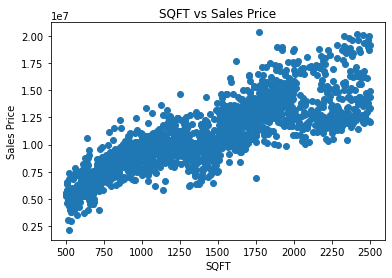

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


In [141]:
df1.groupby('INT_SQFT')['SALES_PRICE'].mean().plot(style='o')
#df1.plot(x='INT_SQFT', y='SALES_PRICE', style='o')
plt.title('SQFT vs Sales Price')
plt.xlabel('SQFT')
plt.ylabel('Sales Price')
plt.show()
df1[['INT_SQFT','SALES_PRICE']].corr()

 There is a linear relationship between sqft and
price 
 As sqft increases, price increase which is in-line with our GK.
 No transformation required

# **DIST_MAINROAD**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


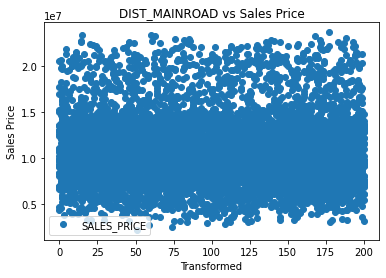

,Transformed,SALES_PRICE
Transformed,1.000000,0.011282
SALES_PRICE,0.011282,1.000000


In [142]:
import numpy as np
df1['Transformed'] = np.log(df1['DIST_MAINROAD'])
#df1.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().plot(style='o')
df1.plot(x='DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('DIST_MAINROAD vs Sales Price')
plt.xlabel('Transformed')
plt.ylabel('Sales Price')
plt.show()
df1[['Transformed','SALES_PRICE']].corr()

In [143]:
df1.drop(columns=['Transformed'],axis=1,inplace=True)

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INT_SQFT               7109 non-null   int64  
 1   DIST_MAINROAD          7109 non-null   int64  
 2   N_BEDROOM              7109 non-null   int64  
 3   N_BATHROOM             7109 non-null   int64  
 4   N_ROOM                 7109 non-null   int64  
 5   QS_ROOMS               7109 non-null   float64
 6   QS_BATHROOM            7109 non-null   float64
 7   QS_BEDROOM             7109 non-null   float64
 8   QS_OVERALL             7109 non-null   float64
 9   SALES_PRICE            7109 non-null   int64  
 10  AREA_Adyar             7109 non-null   uint8  
 11  AREA_Anna Nagar        7109 non-null   uint8  
 12  AREA_Chrompet          7109 non-null   uint8  
 13  AREA_KK Nagar          7109 non-null   uint8  
 14  AREA_Karapakkam        7109 non-null   uint8  
 15  AREA

In [145]:
df1.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,...,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,PARK_FACILTY,BUILDING_TYPE,UTILITY_AVAILABILITY,STREET_TYPE,MZ_ZONE
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,7600000,...,1,0,0,0,0,1,1,0,0,5
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,21717770,...,1,0,0,0,0,0,1,0,1,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,13159200,...,1,0,0,0,0,1,1,3,1,2
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,9630290,...,0,0,1,0,0,0,2,1,0,4
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,7406250,...,1,0,0,0,0,1,2,0,1,3


## **SPLITTING THE DATASET**

In [150]:
X=df1[['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar','AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDING_AGE','SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family','SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACILTY','BUILDING_TYPE', 'UTILITY_AVAILABILITY', 'STREET_TYPE', 'MZ_ZONE']].values
y=df1['SALES_PRICE'].values

In [147]:
df1.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
SALES_PRICE                int64
AREA_Adyar                 uint8
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
BUILDING_AGE               int64
SALE_COND_AbNormal         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACILTY               int64
BUILDING_TYPE              int64
UTILITY_AVAILABILITY       int64
STREET_TYPE                int64
MZ_ZONE                    int64
dtype: object

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **SCALING THE DATASET**

In [149]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

## **MODEL TRAINING USING LINEAR REGRESSION**

In [151]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [2]:
coeff_df = pd.DataFrame(regressor.coef_,['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar','AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDING_AGE','SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family','SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACILTY','BUILDING_TYPE', 'UTILITY_AVAILABILITY', 'STREET_TYPE', 'MZ_ZONE'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

NameError: ignored

In [153]:
regressor.intercept_ # c

10909169.77473757

In [154]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
7091,11437920,1.208928e+07
2236,10248940,1.148479e+07
6494,9283610,1.016044e+07
6361,7174975,9.800147e+06
5497,14416660,1.539449e+07
...,...,...
6645,14647600,1.078841e+07
5574,8445450,1.082753e+07
3606,11139700,9.388594e+06
2100,8092500,5.930652e+06


In [155]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6294078031290362


In [156]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar','AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDING_AGE','SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family','SALE_COND_Normal Sale', 'SALE_COND_Partial', 'PARK_FACILTY','BUILDING_TYPE', 'UTILITY_AVAILABILITY', 'STREET_TYPE', 'MZ_ZONE'],selector.support_))

[('INT_SQFT', True),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('AREA_Adyar', False),
 ('AREA_Anna Nagar', True),
 ('AREA_Chrompet', False),
 ('AREA_KK Nagar', False),
 ('AREA_Karapakkam', True),
 ('AREA_T Nagar', False),
 ('AREA_Velachery', False),
 ('BUILDING_AGE', False),
 ('SALE_COND_AbNormal', False),
 ('SALE_COND_AdjLand', False),
 ('SALE_COND_Family', False),
 ('SALE_COND_Normal Sale', False),
 ('SALE_COND_Partial', False),
 ('PARK_FACILTY', False),
 ('BUILDING_TYPE', False),
 ('UTILITY_AVAILABILITY', False),
 ('STREET_TYPE', False),
 ('MZ_ZONE', False)]